### Capstone Sprint 1 - Satellite Data Monitoring forests
#### James Hoang

In [381]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr

from scipy import stats
from collections import Counter

In [386]:
# Assign the aggregate data of carbon data on country to a variable
C_data = pd.read_csv('Country_carbon_data.csv')

In [ ]:
# Main carbon dataset
Sub_C_data = pd.read_csv('Subnational1_carbon_data.csv')

In [121]:
Sub_C_data.head(10)

,country,subnational1,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,gfw_forest_carbon_gross_emissions_2023__Mg_CO2e
0,Afghanistan,Badakhshan,0,4369203,2710943,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Badakhshan,10,10553,454895,43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Badakhshan,15,3074,140579,46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Badakhshan,20,2088,96521,46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Badakhshan,25,1229,57513,47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,Badakhshan,30,1054,49673,47,43.0,6027.0,-5984.0,0.0,...,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Afghanistan,Badakhshan,50,278,13809,50,15.0,2078.0,-2063.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Afghanistan,Badakhshan,75,27,1721,65,3.0,795.0,-792.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Afghanistan,Badghis,0,2058982,144976,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,Badghis,10,2507,117893,47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# We can see a significant number of nulls as well as the datatypes
Sub_C_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country                                            28000 non-null  object 
 1   subnational1                                       28000 non-null  object 
 2   umd_tree_cover_density_2000__threshold             28000 non-null  int64  
 3   umd_tree_cover_extent_2000__ha                     28000 non-null  int64  
 4   gfw_aboveground_carbon_stocks_2000__Mg_C           28000 non-null  int64  
 5   avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1  28000 non-null  int64  
 6   gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1    10500 non-null  float64
 7   gfw_forest_carbon_gross_removals__Mg_CO2_yr-1      10500 non-null  float64
 8   gfw_forest_carbon_net_flux__Mg_CO2e_yr-1           10500 non-null  float64
 9   gfw_fo

#### Understanding The Subnational Carbon Data fields

**country**: country <br>
**umd_tree_cover_density_2000__threshold**: threshold of tree density that are considered as forested <br>
**umd_tree_cover_extent_2000__ha**: area in hectares considered forested areas given a certain threshold <br>
**gfw_aboveground_carbon_stocks_2000__Mg_C**: amount of carbon stored in aboveground biomass in megagrams (Mg) per country as of 2000 <br>
**avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha**: This represents the average amount of carbon stored per hectare <br>
**gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1**: The estimated annual CO2 emissions (in Mg CO2 equivalent) from forests due to deforestation or degradation including CO2 released from biomass when trees are cut down or burned <br>
**gfw_forest_carbon_gross_removals__Mg_CO2_yr-1**: The estimated amount of CO2 removed annually by forests (in Mg CO2 per year) through processes like forest regrowth and afforestation of forests offsets on emissions since they are carbon sinks <br>
**gfw_forest_carbon_net_flux__Mg_CO2e_yr-1**: Emissions minus removals <br>
**gfw_forest_carbon_gross_emissions_[YEAR]__Mg_CO2e**: Annual gross CO2 emissions for each year from 2001 to 2023 <br>

In [127]:
# checking the sum of nulls is concerning and is due to thresholds 30 and under having no data known from reading the data dict
Sub_C_data.isna().sum()

country                                                  0
subnational1                                             0
umd_tree_cover_density_2000__threshold                   0
umd_tree_cover_extent_2000__ha                           0
gfw_aboveground_carbon_stocks_2000__Mg_C                 0
avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1        0
gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1      17500
gfw_forest_carbon_gross_removals__Mg_CO2_yr-1        17500
gfw_forest_carbon_net_flux__Mg_CO2e_yr-1             17500
gfw_forest_carbon_gross_emissions_2001__Mg_CO2e      17500
gfw_forest_carbon_gross_emissions_2002__Mg_CO2e      17500
gfw_forest_carbon_gross_emissions_2003__Mg_CO2e      17500
gfw_forest_carbon_gross_emissions_2004__Mg_CO2e      17500
gfw_forest_carbon_gross_emissions_2005__Mg_CO2e      17500
gfw_forest_carbon_gross_emissions_2006__Mg_CO2e      17500
gfw_forest_carbon_gross_emissions_2007__Mg_CO2e      17500
gfw_forest_carbon_gross_emissions_2008__Mg_CO2e      175

Since there is still data in these rows with null values, I am more likely to impute 0 values into the data or filter through conditions and subsets when doing EDA but have not fully decided what to do with these nulls since other values within the field are also 0

In [128]:
Sub_C_data.duplicated().sum()

0

In [130]:
# Rename fields to be more readible when plotting
Cleaned_Sub_Carbon = Sub_C_data.rename(columns={'umd_tree_cover_density_2000__threshold': 'canopy_density_threshold',
                                               'umd_tree_cover_extent_2000__ha': 'forested_area',
                                               'gfw_aboveground_carbon_stocks_2000__Mg_C': 'carbon_mg_per_country',
                                               'avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1': 'avg_carbon_per_ha',
                                               'gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1': 'gross_carbon_emissions',
                                               'gfw_forest_carbon_gross_removals__Mg_CO2_yr-1': 'gross_carbon_removed',
                                               'gfw_forest_carbon_net_flux__Mg_CO2e_yr-1': 'net_carbon_emissions',
                                               'gfw_forest_carbon_gross_emissions_2001__Mg_CO2e': 'carbon_emissions_2001',
                                               'gfw_forest_carbon_gross_emissions_2002__Mg_CO2e': 'carbon_emissions_2002',
                                               'gfw_forest_carbon_gross_emissions_2003__Mg_CO2e': 'carbon_emissions_2003',
                                               'gfw_forest_carbon_gross_emissions_2004__Mg_CO2e': 'carbon_emissions_2004',
                                               'gfw_forest_carbon_gross_emissions_2005__Mg_CO2e': 'carbon_emissions_2005',
                                               'gfw_forest_carbon_gross_emissions_2006__Mg_CO2e': 'carbon_emissions_2006',
                                               'gfw_forest_carbon_gross_emissions_2007__Mg_CO2e': 'carbon_emissions_2007',
                                               'gfw_forest_carbon_gross_emissions_2008__Mg_CO2e': 'carbon_emissions_2008',
                                               'gfw_forest_carbon_gross_emissions_2009__Mg_CO2e': 'carbon_emissions_2009',
                                               'gfw_forest_carbon_gross_emissions_2010__Mg_CO2e': 'carbon_emissions_2010',
                                               'gfw_forest_carbon_gross_emissions_2011__Mg_CO2e': 'carbon_emissions_2011',
                                               'gfw_forest_carbon_gross_emissions_2012__Mg_CO2e': 'carbon_emissions_2012',
                                               'gfw_forest_carbon_gross_emissions_2013__Mg_CO2e': 'carbon_emissions_2013',
                                               'gfw_forest_carbon_gross_emissions_2014__Mg_CO2e': 'carbon_emissions_2014',
                                               'gfw_forest_carbon_gross_emissions_2015__Mg_CO2e': 'carbon_emissions_2015',
                                               'gfw_forest_carbon_gross_emissions_2016__Mg_CO2e': 'carbon_emissions_2016',
                                               'gfw_forest_carbon_gross_emissions_2017__Mg_CO2e': 'carbon_emissions_2017',
                                               'gfw_forest_carbon_gross_emissions_2018__Mg_CO2e': 'carbon_emissions_2018',
                                               'gfw_forest_carbon_gross_emissions_2019__Mg_CO2e': 'carbon_emissions_2019',
                                               'gfw_forest_carbon_gross_emissions_2020__Mg_CO2e': 'carbon_emissions_2020',
                                               'gfw_forest_carbon_gross_emissions_2021__Mg_CO2e': 'carbon_emissions_2021',
                                               'gfw_forest_carbon_gross_emissions_2022__Mg_CO2e': 'carbon_emissions_2022',
                                               'gfw_forest_carbon_gross_emissions_2023__Mg_CO2e': 'carbon_emissions_2023',})
# Check changes
Cleaned_Sub_Carbon.head()
                                

,country,subnational1,canopy_density_threshold,forested_area,carbon_mg_per_country,avg_carbon_per_ha,gross_carbon_emissions,gross_carbon_removed,net_carbon_emissions,carbon_emissions_2001,...,carbon_emissions_2014,carbon_emissions_2015,carbon_emissions_2016,carbon_emissions_2017,carbon_emissions_2018,carbon_emissions_2019,carbon_emissions_2020,carbon_emissions_2021,carbon_emissions_2022,carbon_emissions_2023
0,Afghanistan,Badakhshan,0,4369203,2710943,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Badakhshan,10,10553,454895,43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Badakhshan,15,3074,140579,46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Badakhshan,20,2088,96521,46,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Badakhshan,25,1229,57513,47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
# Sum carbon emissions for 2023 by country to see the latest carbon emitters
total_emissions = Cleaned_Sub_Carbon.groupby('country')['carbon_emissions_2023'].sum()

# Sort for top 5 emissions
top_emissions = total_emissions.sort_values(ascending=False).head(5)
print(top_emissions)

country
Brazil                              5.556025e+09
United States                       2.807271e+09
Canada                              2.466330e+09
Democratic Republic of the Congo    2.243375e+09
Russia                              1.951817e+09
Name: carbon_emissions_2021, dtype: float64


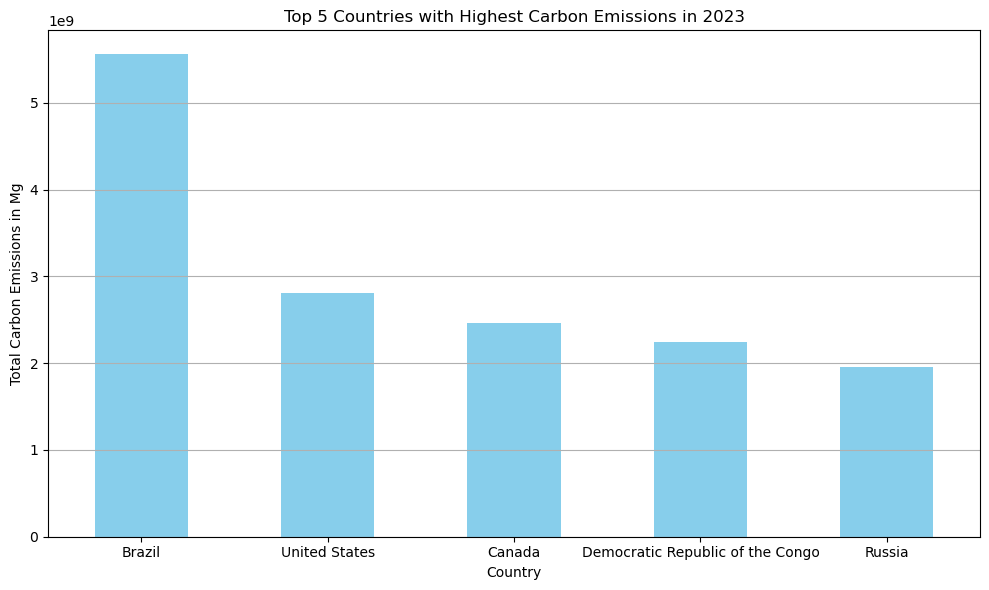

In [332]:
# Plot for top 5 latest carbon emitters
plt.figure(figsize=(10, 6))
top_emissions.plot(color='skyblue', kind='bar')
plt.title('Top 5 Countries with Highest Carbon Emissions in 2023')
plt.xlabel('Country')
plt.ylabel('Total Carbon Emissions in Mg')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**Hypothesis:** Brazil's high contribution in carbon emissions is due to the deforestation in the Amazon rainforests. Carbon emissions for US and Canada could also be due to large oil industry

In [388]:
# Assign the aggregate data of canopy data on country to a variable
T_data = pd.read_csv('Country_tree_cover_loss.csv')

In [141]:
Sub_Tree_Cover = pd.read_csv('Subnational1_tree_cover_loss.csv')

In [409]:
Sub_Tree_Cover.head(20)

,country,subnational1,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
0,Afghanistan,Badakhshan,0,4369203,4369203,4369203,403,3,9,1,...,4,0,0,0,0,0,0,0,0,4
1,Afghanistan,Badakhshan,10,4369203,10553,1763,403,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Afghanistan,Badakhshan,15,4369203,3074,914,403,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,Badakhshan,20,4369203,2088,826,403,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,Badakhshan,25,4369203,1229,474,403,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Afghanistan,Badakhshan,30,4369203,1054,417,403,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Afghanistan,Badakhshan,50,4369203,278,63,403,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Afghanistan,Badakhshan,75,4369203,27,6,403,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Afghanistan,Badghis,0,2058982,2058982,2058982,50,5,2,1,...,0,0,0,0,0,0,0,0,0,0
9,Afghanistan,Badghis,10,2058982,2507,87,50,5,2,1,...,0,0,0,0,0,0,0,0,0,0


#### Understanding The Subnational Tree Cover Data fields

**country**: country <br>
**subnational1**: region/state/province <br>
**threshold**: canopy density that are significant enough to be considered forested <br>
**area_ha**: total available land in hectares of a given area <br>
**extent_2000_ha**: the total land in hectares considered forested in 2000 based on the threshold <br>
**extent_2010_ha**: the total land in hectares considered forested in 2010 based on the threshold  <br>
**gain_2000_2020_ha**: net gain in canopy in hectares from 2000 to 2020 <br>
**tc_loss_ha_[YEAR]**: total loss in hectares of tree cover within the given year<br>

In [366]:
# Does not appear to have any nulls
Sub_Tree_Cover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            28000 non-null  object
 1   subnational1       28000 non-null  object
 2   threshold          28000 non-null  int64 
 3   area_ha            28000 non-null  int64 
 4   extent_2000_ha     28000 non-null  int64 
 5   extent_2010_ha     28000 non-null  int64 
 6   gain_2000-2020_ha  28000 non-null  int64 
 7   tc_loss_ha_2001    28000 non-null  int64 
 8   tc_loss_ha_2002    28000 non-null  int64 
 9   tc_loss_ha_2003    28000 non-null  int64 
 10  tc_loss_ha_2004    28000 non-null  int64 
 11  tc_loss_ha_2005    28000 non-null  int64 
 12  tc_loss_ha_2006    28000 non-null  int64 
 13  tc_loss_ha_2007    28000 non-null  int64 
 14  tc_loss_ha_2008    28000 non-null  int64 
 15  tc_loss_ha_2009    28000 non-null  int64 
 16  tc_loss_ha_2010    28000 non-null  int64

In [370]:
Sub_Tree_Cover.isna().sum()

country              0
subnational1         0
threshold            0
area_ha              0
extent_2000_ha       0
extent_2010_ha       0
gain_2000-2020_ha    0
tc_loss_ha_2001      0
tc_loss_ha_2002      0
tc_loss_ha_2003      0
tc_loss_ha_2004      0
tc_loss_ha_2005      0
tc_loss_ha_2006      0
tc_loss_ha_2007      0
tc_loss_ha_2008      0
tc_loss_ha_2009      0
tc_loss_ha_2010      0
tc_loss_ha_2011      0
tc_loss_ha_2012      0
tc_loss_ha_2013      0
tc_loss_ha_2014      0
tc_loss_ha_2015      0
tc_loss_ha_2016      0
tc_loss_ha_2017      0
tc_loss_ha_2018      0
tc_loss_ha_2019      0
tc_loss_ha_2020      0
tc_loss_ha_2021      0
tc_loss_ha_2022      0
tc_loss_ha_2023      0
dtype: int64

In [372]:
Sub_Tree_Cover.duplicated().sum()

0

In [350]:
# Get column range of years from fields
canopy_loss = [f'tc_loss_ha_{year}' for year in range(2001, 2024)]

# Sum canopy loss per year
canopy_loss_per_year = Sub_Tree_Cover[canopy_loss].sum()

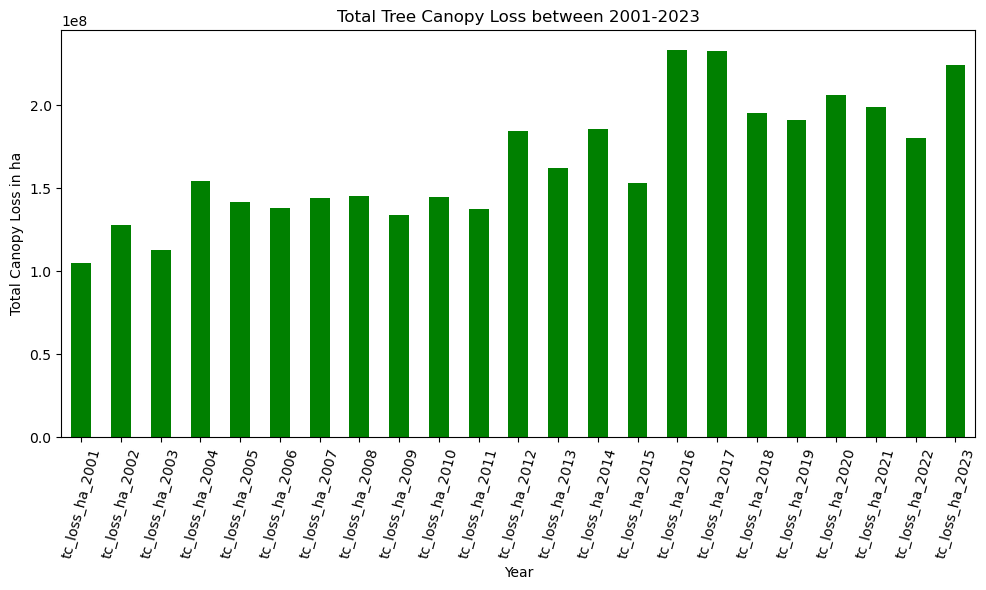

In [360]:
plt.figure(figsize=(10, 6))
canopy_loss_per_year.plot(color='green', kind='bar')
plt.title('Total Tree Canopy Loss between 2001-2023')
plt.xlabel('Year')
plt.ylabel('Total Canopy Loss in ha')
plt.xticks(rotation=75)

plt.tight_layout() 
plt.show()

**Hypothesis**: Since we can see gradual canopy loss, we can theorize and hypothesis that higher threshold (denser forests) suffer from great canopy loss overtime. We can also contextualize possible events that may have happen in the 2015-2016 timeframe such as influx of illegal logging events or policy changes <br>
**Variable Relationships**: From a glance we can presume canopy loss is mildly positvely correlated to year which is an well-known assumption further illustrated <br>
**Feature Engineering Opportunities**: Since there is a gradual loss overtime, some features could involve year-over-year change or possible rolling averages. Other features could include additional datasets like climate(temperature) as there are **many** variables that affect deforestation<br>